# Model Exploration 🔭 - Position

In [1]:
import torch
import torch.nn.functional as F
import torch.nn as nn

import matplotlib.pyplot as plt

import os

import numpy as np
from PIL import Image
from tqdm import tqdm

from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as T

from scripts.unet import UNet
from scripts.transformers import MaskTransformer, PerspectiveTransformer, ThreasholdTransformer
from scripts.dataloaders import PositionDataset

from pytorch_model_summary import summary

import json

In [2]:
# loading our mask model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = UNet(in_channels=3, n_classes=2, wf=5, depth=4, padding=True, up_mode='upsample')
model.load_state_dict(torch.load("state_dicts/checkpoint.pth"))
model.eval()
print(summary(model, torch.zeros((1, 3, 128, 128)), show_input=False))

-------------------------------------------------------------------------
      Layer (type)          Output Shape         Param #     Tr. Param #
   UNetConvBlock-1     [1, 32, 128, 128]          10,144          10,144
   UNetConvBlock-2       [1, 64, 64, 64]          55,424          55,424
   UNetConvBlock-3      [1, 128, 32, 32]         221,440         221,440
   UNetConvBlock-4      [1, 256, 16, 16]         885,248         885,248
     UNetUpBlock-5      [1, 128, 32, 32]         475,520         475,520
     UNetUpBlock-6       [1, 64, 64, 64]         118,976         118,976
     UNetUpBlock-7     [1, 32, 128, 128]          29,792          29,792
          Conv2d-8      [1, 2, 128, 128]              66              66
Total params: 1,796,610
Trainable params: 1,796,610
Non-trainable params: 0
-------------------------------------------------------------------------


In [3]:
# load the data
pd = PositionDataset("data/goBoards/training/", 128, model)

100%|██████████| 1000/1000 [00:39<00:00, 25.29it/s]


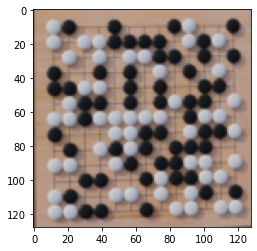

In [4]:
plt.imshow(pd[42][0].permute(1,2,0))

In [5]:
plt.imshow(pd[42][0])

952